<a href="https://colab.research.google.com/github/wel51x/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/LS_DS_121_Assignment_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

### 2. List Comprehension

### 3. Filter with named function

### 4. Filter with anonymous function

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

### long title

### first letter

### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [0]:
!pip install textstat

## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

Titles sorted reverse alphabetically

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

Percentage of talks with long titles

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

Histogram of title lengths, in characters

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?
- What's the distribution of grade levels? Plot a histogram.



In [0]:
!pip install textstat

In [0]:
import numpy as np
import requests, bs4
import textstat

import pandas as pd
pd.options.display.max_colwidth = 200

In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'

result = requests.get(url)

In [0]:
soup = bs4.BeautifulSoup(result.text)

descriptions = [tag.text.strip() for tag in soup.select('.presentation-description')]

In [0]:
type(descriptions), len(descriptions)

(list, 95)

In [0]:
# create data frame
df = pd.DataFrame({'description': descriptions})

In [0]:
df['description character count'] = df['description'].apply(len)

In [0]:
df['description word count'] = df['description'].apply(textstat.lexicon_count)

In [0]:
df['description grade level'] = df['description'].apply(textstat.flesch_kincaid_grade)

In [0]:
df.head()

,description,description character count,description word count,description grade level
0,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,440,78,7.4
1,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",881,141,14.3
2,"In this talk, youâll learn about a category of security issue known as side channel attacks. Youâll be amused to see how features like automatic data compression, short-circuit execution, and ...",647,96,11.9
3,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re...",1080,178,16.0
4,"Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In ...",1147,188,18.0


In [0]:
df.tail()

,description,description character count,description word count,description grade level
90,"Know you should be doing testing but havenât gotten over the hurdle to learn it? pytest is Pythonâs modern, friendly, and powerful testing framework. When paired with an IDE, testing gets a vi...",718,115,13.3
91,How do you become a Python core developer? How can I become one? What is it like to be a Python core developer?\r\n\r\nThese are the questions I often receive ever since I became a Python core dev...,511,96,7.2
92,"Many of us practice test driven development, and pride ourselves in our code coverage. This is relatively easy to do when you begin a new project, but what happens when you take over an existing c...",662,117,10.1
93,"RESTful has been the go-to choice of API world. Why another API approach? To support more data-driven applications, to provide more flexibility and ease unnecessary code and calls, to address a wi...",758,109,13.9
94,"Knowing how to code and being able to teach it are two separate skills. When we have expertise in a subject, it's common to take for granted that we'll be able to effectively communicate our exper...",420,72,11.5


In [0]:
df.describe()

,description character count,description word count,description grade level
count,95.000000,95.000000,95.000000
mean,846.063158,134.578947,18.117895
std,450.107713,70.019082,15.835652
min,201.000000,35.000000,3.700000
25%,550.000000,91.500000,10.500000
50%,758.000000,119.000000,13.800000
75%,978.000000,149.500000,17.950000
max,2794.000000,436.000000,107.800000


In [0]:
print("average description word count is:", df['description word count'].mean())
print("lowest description word count is:", df['description word count'].min())
print("highest description word count is:", df['description word count'].max())

average description word count is: 134.57894736842104
lowest description word count is: 35
highest description word count is: 436


In [0]:
print("The following items fit in a 280-character tweet:")
df[(df['description character count'] < 281)==True]

The following items fit in a 280-character tweet:


,description,description character count,description word count,description grade level
44,A function is a small chunk of code that does useful work. Your job when writing a function is to do it in a way that it easy to read. Based on over 15 years of code reviews here are some tips and...,231,49,3.7
62,"For 2 years, a family of three has traveled on a converted school bus from conference to conference, building tooling for the road in Python and visiting Python families in every corner of the cou...",201,35,15.8
65,"Python 3 removes a lot of the confusion around Unicode handling in Python, but that by no means fixes everything. Different locales and writing systems have unique behaviours that can trip you up....",262,45,6.8


In [0]:
#df[(df['description grade level'] > 20)==True] #reading at grade level 107???
print("description grade level varies between", df['description grade level'].min(),'at the low end and an upper bound of', df['description grade level'].max())
print("There are",len(df[(df['description grade level'] > 25)==True]), "descriptions above grade level 25, so I'm not sure what's going on here")

description grade level varies between 3.7 at the low end and an upper bound of 107.8
There are 13 descriptions above grade level 25, so I'm not sure what's going on here


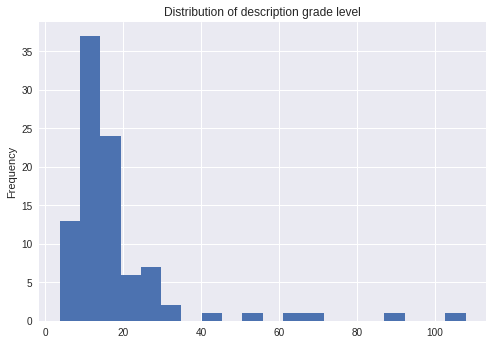

In [0]:
title = 'Distribution of description grade level'
df['description grade level'].plot.hist(title=title, bins=20);

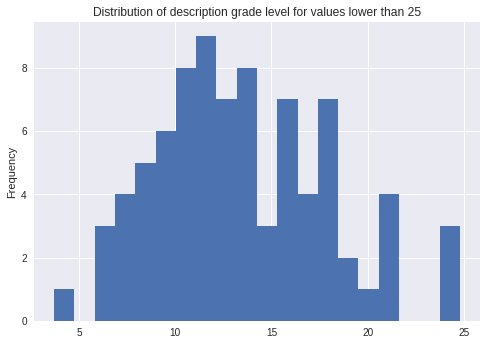

In [0]:
# Take out outliers(?), see what we've got
title += ' for values lower than 25'
df1 = df[(df['description grade level'] < 25)==True]
df1['description grade level'].plot.hist(title=title, bins=20);